In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


from tyssue import Sheet, SheetGeometry as geom
from tyssue import Monolayer, config
from tyssue.io import hdf5
from tyssue.draw.threejs_draw import view_3js
from tyssue.draw.plt_draw import quick_edge_draw
%matplotlib inline

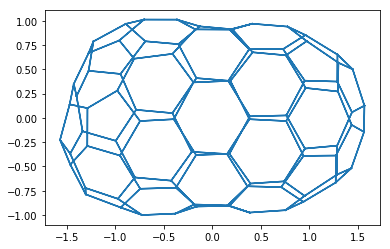

In [7]:
dsets = hdf5.load_datasets('../data/hf5/ellipsoid_sheet.hf5',
                           data_names=['vert', 'edge', 'face'])

ellipsoid_sheet = Sheet('ellipse', dsets,
                        config.geometry.rod_sheet())

fig, ax = quick_edge_draw(ellipsoid_sheet, coords=list('zx'))

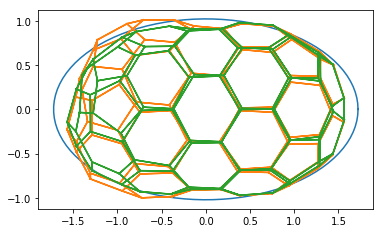

In [8]:
def to_spherical(sheet):
    
    sheet.vert_df['r'] = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    sheet.vert_df['theta'] = sheet.vert_df.eval('arccos(z/r)')
    sheet.vert_df['phi'] = np.arctan2(sheet.vert_df['y'],
                                      sheet.vert_df['x'])

def fit_ellipsoid(sheet):
    
    rho = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    theta = np.arccos(sheet.vert_df['z']/rho)
    u = rho * np.cos(theta)
    v = rho * np.sin(theta)
    poly = np.polyfit(u**2, v**2, deg=1)

    b = np.sqrt(poly[1])
    a = np.sqrt(-poly[1]/poly[0])
    return a, b

to_spherical(ellipsoid_sheet)

a, b = fit_ellipsoid(ellipsoid_sheet)

fig, ax = plt.subplots()
theta = np.linspace(0, 2*np.pi, 100)

ax.plot(a * np.cos(theta), b * np.sin(theta))

fig, ax = quick_edge_draw(ellipsoid_sheet, list('zx'), ax=ax)
fig, ax = quick_edge_draw(ellipsoid_sheet, list('zy'), ax=ax)



In [14]:
polys = ellipsoid_sheet.face_polygons(ellipsoid_sheet.coords)

In [17]:
polys.loc[0]

array([[0.6691236908374838, -0.042594706659953636, -1.2740433871292371],
       [0.7871725596422671, 0.3234752507577644, -1.2254900393720058],
       [0.9679545430300731, 0.37975956834858615, -0.8925329016989223],
       [1.0123318914673556, 0.024317088909197277, -0.7046037841476198],
       [0.7971412283760081, -0.2707534330923486, -0.9591584471777459]],
      dtype=object)

In [39]:

u, s, v = np.linalg.svd(polys.loc[0].astype(np.float) - polys.loc[0].astype(np.float).mean(axis=1)[:, None], full_matrices=True)

In [40]:
u, s, v

(array([[-0.46907762,  0.10892451, -0.71490541, -0.33917579, -0.37679128],
        [-0.49447323,  0.56279065,  0.60024563, -0.23986667, -0.1446792 ],
        [-0.45205768,  0.25770616, -0.24384778,  0.57518125,  0.58218226],
        [-0.40314563, -0.49470789,  0.2154076 ,  0.52388944, -0.52141838],
        [-0.41058478, -0.60021144,  0.15084183, -0.47130685,  0.47569208]]),
 array([2.96171709e+00, 4.92981816e-01, 1.84109660e-16]),
 array([[-0.65579603, -0.09334856,  0.74914459],
        [-0.48641365,  0.81114284, -0.3247292 ],
        [ 0.57735027,  0.57735027,  0.57735027]]))

[None]

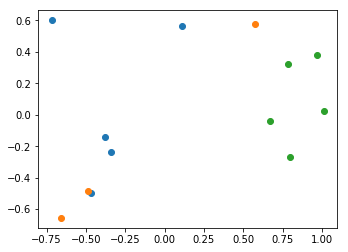

In [44]:
fig, ax = plt.subplots()

ax.plot(u[0, :], u[1, :], 'o')
ax.plot(v[:, 0], v[:, 0], 'o')

ax.plot(polys.loc[0][:, 0], polys.loc[0][:, 1], 'o' )
ax.set(aspect='equal')

In [28]:
np.linalg.norm(v, axis=0)

array([1., 1., 1.])

### Pseudo ellipsis (i.e rod)

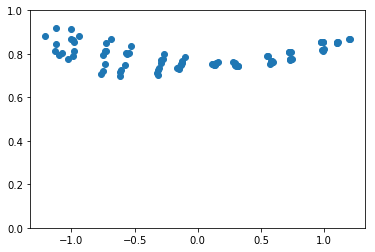

In [5]:
from tyssue import SheetGeometry

SheetGeometry.update_all(ellipsoid_sheet)

ellipsoid_sheet.vert_df.rho.mean()

fig, ax = plt.subplots()
ax.plot(ellipsoid_sheet.vert_df.z, ellipsoid_sheet.vert_df.rho, 'o')
ax.set_ylim(0, 1);

In [6]:
rdr, lines = view_3js(ellipsoid_sheet)
rdr